
# Best site 
#https://towardsdatascience.com/the-triune-pipeline-for-three-major-transformers-in-nlp-18c14e20530
#

### Business Context

To build text classificaton model using a dataset which contains what corporations actually talk about on social media. The statements were labelled as into following categories - `information` (objective statements about the company or it's activities), `dialog` (replies to users, etc.), or `action` (messages that ask for votes or ask users to click on links, etc.). Our aim is to build a model to automatically categorize the text into their respective categories. You can download the dataset from [here](https://data.world/crowdflower/corporate-messaging)

### Task 1: Understanding and loading the dataset

In [53]:
# load required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [54]:
# load the dataset

data = pd.read_csv('/home/abderrazak/ALLINHERE/NLP/Coursera/corporate_messaging_dfe.csv')

In [55]:
# see head of the dataset

data.head(3)

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,category,category_confidence,category_gold,id,screenname,text
0,662822308,False,finalized,3,2015-02-18T04:31:00,Information,1.0,NaN,436528000000000000,Barclays,Barclays CEO stresses the importance of regula...
1,662822309,False,finalized,3,2015-02-18T13:55:00,Information,1.0,NaN,386013000000000000,Barclays,Barclays announces result of Rights Issue http...
2,662822310,False,finalized,3,2015-02-18T08:43:00,Information,1.0,NaN,379580000000000000,Barclays,Barclays publishes its prospectus for its �5.8...


In [56]:
# observe shape of the dataset

data.shape

(3118, 11)

In [57]:
# check distribution of target column i.e. category

data.category.value_counts()

Information    2129
Action          724
Dialogue        226
Exclude          39
Name: category, dtype: int64

In [58]:
data.groupby('category').count()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,category_confidence,category_gold,id,screenname,text
category,,,,,,,,,,
Action,724,724,724,724,628,724,96,724,724,724
Dialogue,226,226,226,226,207,226,19,226,226,226
Exclude,39,39,39,39,38,39,1,39,39,39
Information,2129,2129,2129,2129,1938,2129,191,2129,2129,2129


In [59]:
# check distribution of the column - category_confidence
data.category_confidence.value_counts()

1.0000    2430
0.6614      35
0.6643      33
0.6747      32
0.6775      29
0.6662      24
0.6668      23
0.6663      21
0.6675      21
0.6743      18
0.6639      17
0.6763      17
0.6634      13
0.6573      13
0.3386      13
0.3418      12
0.6602      11
0.6631      11
0.6731      11
0.6569      10
0.6582      10
0.6496      10
0.6809       7
0.6645       7
0.6728       7
0.6460       7
0.6647       6
0.6677       6
0.6811       5
0.6656       5
          ... 
0.7555       1
0.8726       1
0.6609       1
0.8898       1
0.9041       1
0.7119       1
0.6612       1
0.8994       1
0.8390       1
0.6627       1
0.6616       1
0.7489       1
0.3525       1
0.7802       1
0.5775       1
0.8973       1
0.7632       1
0.6638       1
0.8530       1
0.6689       1
0.8749       1
0.5728       1
0.8791       1
0.9105       1
0.6605       1
0.8547       1
0.6641       1
0.8578       1
0.9089       1
0.8245       1
Name: category_confidence, Length: 194, dtype: int64

In [60]:
# remove those observations where category_confidence < 1 and category = Exclude

data = data[(data['category_confidence'] == 1) & (data['category'] != 'Exclude')]

In [61]:
# extract features i.e the column - text and target i.e the column - category

features = data['text']
target = data['category']
print(features.shape)
print(target.shape)

(2403,)
(2403,)


### Task 2: Text preprocessing

In [62]:
# let's observe a text in the dataset, extract the first text
features[0]

'Barclays CEO stresses the importance of regulatory and cultural reform in financial services at Brussels conference  http://t.co/Ge9Lp7hpyG'

In [65]:
# now extract the third text from this dataset

features[3]

'Barclays Group Finance Director Chris Lucas is to step down at the end of the week due to ill health http://t.co/nkuHoAfnSD'

We will do the below pre-processing tasks on the text 
- tokenizing the sentences
- replace the urls with a placeholder
- removing non ascii characters
- text normalizing using lemmatization

In [67]:
# import re library for regular expressions

import re                                  # library for regular expression operations
import string                              # for string operations
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings
# Spacy preporcessing 
#Stop words
#importing stop words from English language.
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import re 
import re 
# import nltk library

import  nltk 
# import stopwords from nltk library
from nltk.corpus import stopwords 
# download the stopwords and wordnet corpus
nltk.download('wordnet')

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()


# extract the english stopwords and save it to a variable

nltk.download('stopwords')
# import word_tokenize from nltk library
stopwords = stopwords.words('english')

# import WordNetLemmatizer from nltk library
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer 

# write a regular expression to identify urls in text
url_regex = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

# write a regular expression to identify non-ascii characters in text
non_ascii_regex = r'[^\x00-\x7F]+'

# write a function to tokenize text after performing preprocessing 
def tokenize(text):
    
    # use library re to replace urls by token - urlplaceholder
    text = re.sub(url_regex, 'urlplaceholder', text)
    
    # use library re to replace non ascii characters by a space
    text = re.sub(non_ascii_regex, ' ', text)

    # use word_tokenize to tokenize the sentences
    mytokens = nlp(text)
    
    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]
    

    # return the tokens
    return mytokens

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/abderrazak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/abderrazak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Task 3: EDA

In this task, we will do exploratory data analysis to check if there is any new feature that we can generate based on the existing text that we have in the dataset

**Hypothesis 1:** The length of the text in each category might be different from each other
<br>**Hypothesis 2:** The total number of URLs that are present in text might be different in each category

<AxesSubplot:xlabel='category', ylabel='length'>

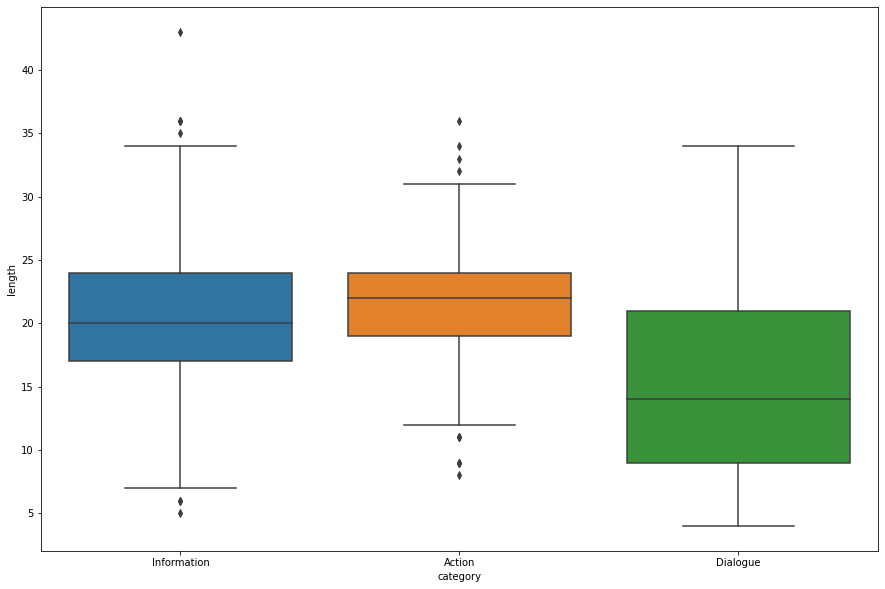

In [72]:
# create a new column in the original dataset - 'length' to capture length of each text
data['length'] = data['text'].apply(lambda x: len(nlp(x))) 

# use seaborn boxplot to visualize the pattern in length for each category
plt.figure(figsize=(15,10))
sns.boxplot(x="category", y="length", data=data)

In [75]:
# create a new column in the original dataset - 'url_count' to capture total count of urls present in each text
data['url_count'] = data['text'].apply(lambda x: len(re.findall(url_regex,x) ))


# use pandas crosstab to see the distibution of different url counts in each category
pd.crosstab(data.category,data.url_count, normalize= True )

url_count,0,1,2
category,,,
Action,0.014565,0.166042,0.009155
Dialogue,0.032876,0.018727,0.000000
Information,0.205576,0.533916,0.019143


### Task 4: Creating custom transformers

An estimator is any object that learns from data, whether it's a classification, regression, or clustering algorithm, or a transformer that extracts or filters useful features from raw data. Since estimators learn from data, they each must have a `fit` method that takes a dataset.

There are two kinds of estimators - `Transformer Estimators` i.e. transformers in short and `Predictor Estimators` i.e. predictor in short. In transformers we also need to have another method `transform` and predictors need to have another method `predict`.

Some examples of `transformers` are - CountVectorizer, TfidfVectorizer, MinMaxScaler, StandardScaler etc

Some examples of `predictors` are - LinearRegression, LogisticRegression, RandomForestClassifier etc

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [103]:
# create a custom transformer LengthExtractor to extract length of each sentences
class LengthExtractor(BaseEstimator, TransformerMixin):
    """Takes in dataframe, extracts road name column, outputs average word length"""

    def compute_length(self, text):
        """Helper code to compute the  length of a text """
        mytokens_list= nlp(text)
        return len(mytokens_list)
    
    def fit(self, x, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self

    def transform(self,x, y=None):
        """The workhorse of this feature extractor"""
        X_length = pd.Series(x).apply(self.compute_length) 
        return pd.DataFrame(X_length )
  

In [104]:
# create a custom transformer UrlCounter to count number of urls in each sentences
class UrlExtractor(BaseEstimator, TransformerMixin):
    """Takes in dataframe, extracts UrlCount"""
    
    def Urlcount(self, text):
        """Helper code to compute the  count of url """
        urls= re.findall(url_regex,text)
        return len(urls)

    def fit(self, x, y=None):
        """Returns `self` unless something different happens in train and test"""
        return self

    def transform(self,x, y=None):
        """The workhorse of this feature extractor"""
        Url_count = pd.Series(x).apply(self.Urlcount) 
        return pd.DataFrame(Url_count)

### Task 5: Model Building using FeatureUnion

Feature union applies a list of transformer objects in parallel to the input data, then concatenates the results. This is useful to combine several feature extraction mechanisms into a single transformer.

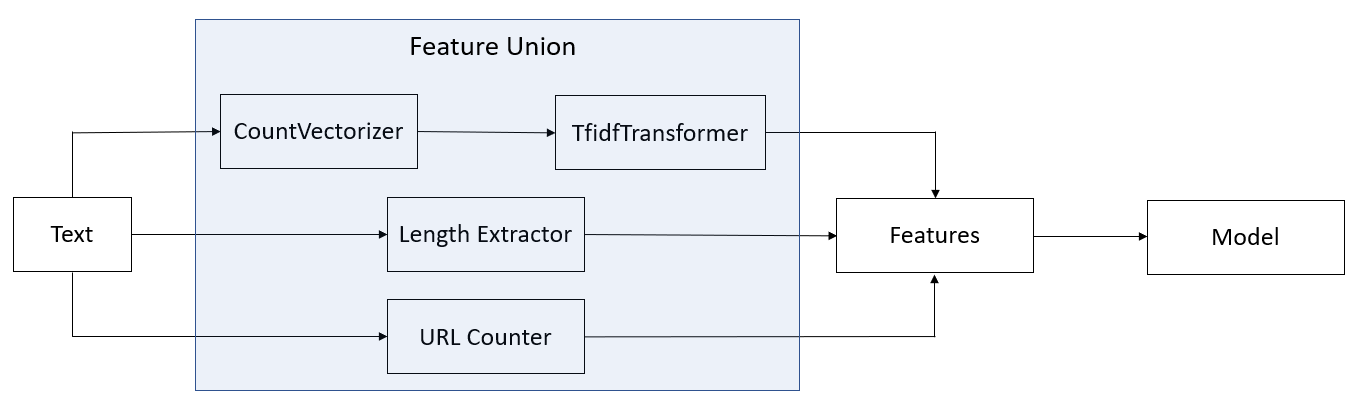

In [105]:
# import RandomForestClassifier from sklearn
from sklearn.ensemble import RandomForestClassifier

# import Pipeline and FeatureUnion from sklearn
from sklearn.pipeline import Pipeline, FeatureUnion

# import CountVectorizer, TfidfTransformer from sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [106]:
# create an instance of Pipeline class
pipeline = Pipeline([
    
        # create a FeatureUnion pipeline
        ('features', FeatureUnion([

            # add a pipeline element to extract features using CountVectorizer and TfidfTransformer
            ('Text_pipeline', Pipeline([
            ('vect', CountVectorizer(tokenizer=tokenize)),
             ('tfidf', TfidfTransformer())
             ])),
            # add the pipeline element - LengthExtractor to extract lenght of each sentence as feature
            ('text_length', LengthExtractor()),
            
            # add another pipeline element - UrlCounter to extract url counts in each sentence as feature
             ('Url_count', UrlExtractor())
          ])),
        # use the predictor estimator RandomForestClassifier to train the model
         ('clf', RandomForestClassifier())
        ])


In [139]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
import tensorflow as tf 
features = data['text']
target = data['category']
#### Create the encoder.
encoder = LabelEncoder()

encoder.fit(target)   # Assume for simplicity all features are categorical.

target_le = encoder.transform(target)

target_oh =tf.keras.utils.to_categorical(target_le)

print("target_le",target_le.shape)

print("target_oh",target_oh.shape)

print(encoder.classes_)

target_le (2403,)
target_oh (2403, 3)
['Action' 'Dialogue' 'Information']


In [141]:
# split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(features, target_oh, test_size = 0.3,random_state=1)


In [ ]:
# use pipeline.fit method to train the model
# train classifier
pipeline.fit(X_train, y_train)


### Task 6: Model Evaluation

Now, once the model is trained, in this task we will evaluate how the model behaves in the test data

In [ ]:
# use the method pipeline.predict on X_test data to predict the labels

y_pred=pipeline.predict(X_test)

In [ ]:
# create the confustion matrix, import confusion_matrix from sklearn

from sklearn.metrics import classification_report,confusion_matrix 
# count the number of labels
labels= np.unique(y_train)

labels

In [ ]:
# use sns.heatmap on top of confusion_matrix to show the confusuin matrix

ax= plt.subplot()
sns.heatmap(confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1),labels=labels), annot=True,ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Action' ,'Dialogue'])
ax.yaxis.set_ticklabels(['Action' ,'Dialogue'])

In [ ]:
# create the classification report, import classification_report from sklearn


# apply the function classification_report on y_test, y_pred and print it
print(classification_report(y_test, y_pred))

### Task 7: Conclusion and next steps

How to improve this model - 

- hyper parameter tuning
- more feature engineering
- feature selection
- trying different predictors

# Embedding Transformer 

In [ ]:
# Embedding 
path_to_word_vectors = "/Users/jlee/glove.6B.50d.txt"
def load_glove(path_to_word_vectors):
    f = open(path_to_word_vectors, "r")
    word2vec = {}
    for line in f:
        split_line = line.split()
        word = split_line[0]
        embedding = np.array([float(val) for val in split_line[1:]])
        model[word] = embedding
    return word2vecword2vec = load_glove(path_to_word_vectors)

In [ ]:
import spacy 
from sklearn.base import BaseEstimator, TransformerMixin
nlp = spacy.load("en_core_web_md")  # this model will give you 300 D
class SpacyVectorTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, nlp):
        self.nlp = nlp
        self.dim = 300

    def fit(self, X, y):
        return self

    def transform(self, X):
        # Doc.vector defaults to an average of the token vectors.
        # https://spacy.io/api/doc#vector
        return [self.nlp(text).vector for text in X]

In [ ]:
embeddings_pipeline = Pipeline(
    steps=[
        ("mean_embeddings", SpacyVectorTransformer(nlp)),
        ("reduce_dim", TruncatedSVD(50)),
        ("classifier", RandomForestClassifier()),
    ]
)embeddings_pipeline.fit(train_data, train_target)
y_pred = embeddings_pipeline.predict(test_data)
cr = classification_report(test_target, y_pred)

In [ ]:
https://explosion.ai/blog/spacy-deep-learning-keras
https://towardsdatascience.com/hands-on-nlp-deep-learning-model-preparation-in-tensorflow-2-x-2e8c9f3c7633